In [11]:
from src.exploratory_data_analysis import *
import pandas as pd
import warnings
# ปิดการแสดง Warning ทั้งหมด
warnings.filterwarnings("ignore")

# ตั้งค่าให้ pandas แสดงทุกคอลัมน์
pd.set_option('display.max_columns', None)

In [12]:
df = pd.read_csv('accident2024 + $Damage.csv')

# Explore พื้นฐาน

In [13]:
df.head(2)

,ปีที่เกิดเหตุ,วันที่เกิดเหตุ,เวลา,วันที่รายงาน,เวลาที่รายงาน,ACC_CODE,หน่วยงาน,สายทางหน่วยงาน,รหัสสายทาง,สายทาง,KM,จังหวัด,รถคันที่1,บริเวณที่เกิดเหตุ,มูลเหตุสันนิษฐาน,ลักษณะการเกิดอุบัติเ,สภาพอากาศ,LATITUDE,LONGITUDE,จำนวนรถที่เกิดเหตุ,จำนวนที่เกิดเหตุทั้ง,รถจักรยานยนต์,รถสามล้อเครื่อง,รถยนต์นั่งส่วนบุคคล,รถตู้,รถปิคอัพโดยสาร,รถโดยสารมากกว่า4ล้อ,รถปิคอัพบรรทุก4ล้อ,รถบรรทุก6ล้อ,รถบรรทุกไม่เกิน10ล้อ,รถบรรทุกมากกว่า10ล้อ,รถอีแต๋น,อื่นๆ,คนเดินเท้า,จำนวนผู้เสียชีวิต,จำนวนผู้บาดเจ็บสาหัส,จำนวนผู้บาดเจ็บเล็ก,รวมจำนวนผู้บาดเจ็บ,มูลค่าความเสียหาย
0,2024.0,01-01-24,0:12,06/18/2024,14:23,9701543.0,กรมทางหลวง,ทางหลวง,4164,NaN,17.200,พัทลุง,รถจักรยานยนต์,ทางตรง+ไม่มีความลาดชัน,เมาสุรา,พลิกคว่ำ/ตกถนนในทางตรง,แจ่มใส,7.709830,99.834676,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,62536
1,2024.0,01-01-24,0:30,01-01-24,12:13,8901889.0,กรมทางหลวง,ทางหลวง,106,ลี้ - ม่วงโตน,161.891,ลำพูน,รถจักรยานยนต์,ทางตรง+ไม่มีความลาดชัน,เมาสุรา,พลิกคว่ำ/ตกถนนในทางตรง,แจ่มใส,17.949495,98.900759,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,653759


In [14]:
car_column = ['รถจักรยานยนต์', 'รถสามล้อเครื่อง', 'รถยนต์นั่งส่วนบุคคล', 'รถตู้',
       'รถปิคอัพโดยสาร', 'รถโดยสารมากกว่า4ล้อ', 'รถปิคอัพบรรทุก4ล้อ',
       'รถบรรทุก6ล้อ', 'รถบรรทุกไม่เกิน10ล้อ', 'รถบรรทุกมากกว่า10ล้อ',
       'รถอีแต๋น', 'อื่นๆ']

injury_column = ['จำนวนผู้บาดเจ็บเล็ก','จำนวนผู้บาดเจ็บสาหัส']


# df['check_ความถูกต้องรวมจำนวนรถ'] = df['จำนวนรถที่เกิดเหตุ'] == df[car_column].sum(axis=1)
# df['check_ความถูกต้องจำนวนทั้งคนทั้งรถ'] = df['จำนวนที่เกิดเหตุทั้ง'] == (df['จำนวนรถที่เกิดเหตุ'] + df['รวมจำนวนผู้บาดเจ็บ'] + df['คนเดินเท้า'])
# df['check_ความถูกต้องรวมจำนวนผู้บาดเจ็บ'] = df['รวมจำนวนผู้บาดเจ็บ'] == df[injury_column].sum(axis=1)

ข้อมูล Accident 2014 ประกอบด้วยข้อมูลอุบัติเหตุในปี 2014 ซึ่งมีการบรรยายอุบัติเหตุไว้ใน column ดังนี้
* วันเวลาที่เกิดเหตุ และ รายงาน : ['ปีที่เกิดเหตุ', 'วันที่เกิดเหตุ', 'เวลา', 'วันที่รายงาน','เวลาที่รายงาน']
* หน่วยงานที่รายงานอุบัติเหตุ : ['หน่วยงาน','สายทางหน่วยงาน']
* สถานที่เกิดเหตุ : ['รหัสสายทาง','สายทาง', 'KM', 'จังหวัด','บริเวณที่เกิดเหตุ','สภาพอากาศ','LATITUDE','LONGITUDE']
* บรรยายลักษณะการเกิดอุบัติ (เชิง qualitative) : ['มูลเหตุสันนิษฐาน','ลักษณะการเกิดอุบัติเ','รถคันที่1']
* บรรยายลักษณะการเกิดอุบัติ (เชิง quantitative) : ['จำนวนรถที่เกิดเหตุ', 'จำนวนที่เกิดเหตุทั้ง','รถจักรยานยนต์', 'รถสามล้อเครื่อง', 'รถยนต์นั่งส่วนบุคคล', 'รถตู้',
       'รถปิคอัพโดยสาร', 'รถโดยสารมากกว่า4ล้อ', 'รถปิคอัพบรรทุก4ล้อ',
       'รถบรรทุก6ล้อ', 'รถบรรทุกไม่เกิน10ล้อ', 'รถบรรทุกมากกว่า10ล้อ',
       'รถอีแต๋น', 'อื่นๆ', 'คนเดินเท้า', 'จำนวนผู้เสียชีวิต',
       'จำนวนผู้บาดเจ็บสาหัส', 'จำนวนผู้บาดเจ็บเล็ก', 'รวมจำนวนผู้บาดเจ็บ',
       'มูลค่าความเสียหาย'] 

In [15]:
datetime_feature = ['ปีที่เกิดเหตุ', 'วันที่เกิดเหตุ', 'เวลา', 'วันที่รายงาน','เวลาที่รายงาน']

categorical_feature = ['หน่วยงาน', 'สายทางหน่วยงาน', 'รหัสสายทาง','สายทาง', 'จังหวัด', 'รถคันที่1', 'บริเวณที่เกิดเหตุ',
                       'มูลเหตุสันนิษฐาน', 'ลักษณะการเกิดอุบัติเ', 'สภาพอากาศ']

numerical_feature = ['จำนวนรถที่เกิดเหตุ', 'จำนวนที่เกิดเหตุทั้ง',
       'รถจักรยานยนต์', 'รถสามล้อเครื่อง', 'รถยนต์นั่งส่วนบุคคล', 'รถตู้',
       'รถปิคอัพโดยสาร', 'รถโดยสารมากกว่า4ล้อ', 'รถปิคอัพบรรทุก4ล้อ',
       'รถบรรทุก6ล้อ', 'รถบรรทุกไม่เกิน10ล้อ', 'รถบรรทุกมากกว่า10ล้อ',
       'รถอีแต๋น', 'อื่นๆ', 'คนเดินเท้า', 'จำนวนผู้เสียชีวิต',
       'จำนวนผู้บาดเจ็บสาหัส', 'จำนวนผู้บาดเจ็บเล็ก', 'รวมจำนวนผู้บาดเจ็บ',
       'มูลค่าความเสียหาย']

### ตรวจสอบ Missing Value

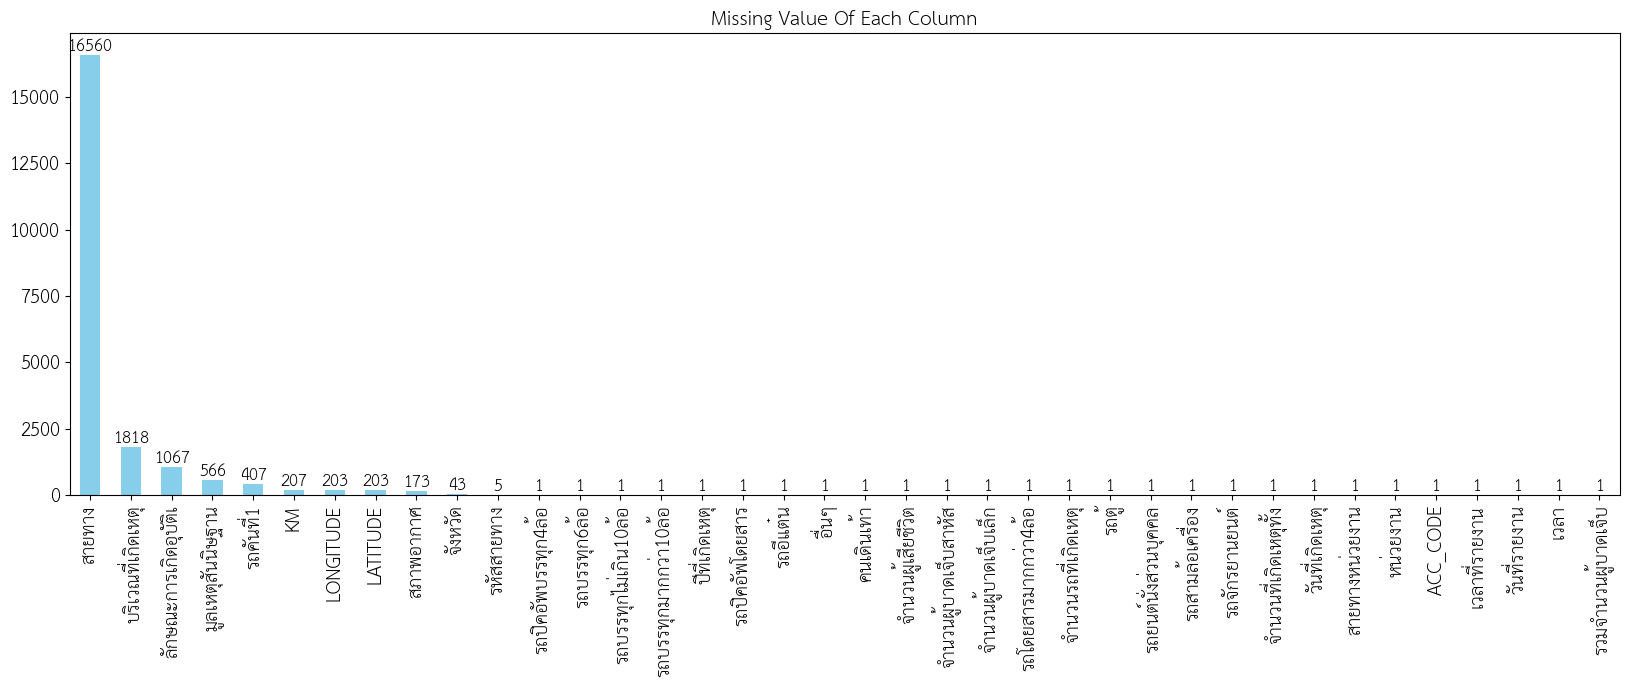

In [16]:
plot_missing_value(df)

Key Takeaway : 
* ทุก ๆ column มีข้อมูลที่ขาดหายไปอย่างน้อย 1 ROW 
* ข้อมูลสายทางเป็นข้อมูลที่ขาดหายไปสูง

In [17]:
df.tail(1)

,ปีที่เกิดเหตุ,วันที่เกิดเหตุ,เวลา,วันที่รายงาน,เวลาที่รายงาน,ACC_CODE,หน่วยงาน,สายทางหน่วยงาน,รหัสสายทาง,สายทาง,KM,จังหวัด,รถคันที่1,บริเวณที่เกิดเหตุ,มูลเหตุสันนิษฐาน,ลักษณะการเกิดอุบัติเ,สภาพอากาศ,LATITUDE,LONGITUDE,จำนวนรถที่เกิดเหตุ,จำนวนที่เกิดเหตุทั้ง,รถจักรยานยนต์,รถสามล้อเครื่อง,รถยนต์นั่งส่วนบุคคล,รถตู้,รถปิคอัพโดยสาร,รถโดยสารมากกว่า4ล้อ,รถปิคอัพบรรทุก4ล้อ,รถบรรทุก6ล้อ,รถบรรทุกไม่เกิน10ล้อ,รถบรรทุกมากกว่า10ล้อ,รถอีแต๋น,อื่นๆ,คนเดินเท้า,จำนวนผู้เสียชีวิต,จำนวนผู้บาดเจ็บสาหัส,จำนวนผู้บาดเจ็บเล็ก,รวมจำนวนผู้บาดเจ็บ,มูลค่าความเสียหาย
19390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,739736


มีข้อมูล 1 ROW ที่ข้อมูลหายไปทุก column ยกเว้นมูลค่าความเสียหาย

# Duplicate

In [18]:
# หาจำนวนแถวที่ซ้ำกันทั้งหมด
total_duplicates = df.duplicated().sum()

# แสดงผล
if total_duplicates > 0:
    print(f"พบค่าซ้ำกันทั้งหมด: {total_duplicates} แถว")
    print(" ตัวอย่างแถวที่ซ้ำกัน:")
    print(df[df.duplicated()].head())  # แสดงตัวอย่างแถวที่ซ้ำกัน
else:
    print("ไม่พบแถวที่มีค่าซ้ำกันใน DataFrame")

ไม่พบแถวที่มีค่าซ้ำกันใน DataFrame


# ตรวจสอบข้อมูลประเภท Categorical และ Numerical

### Categorical

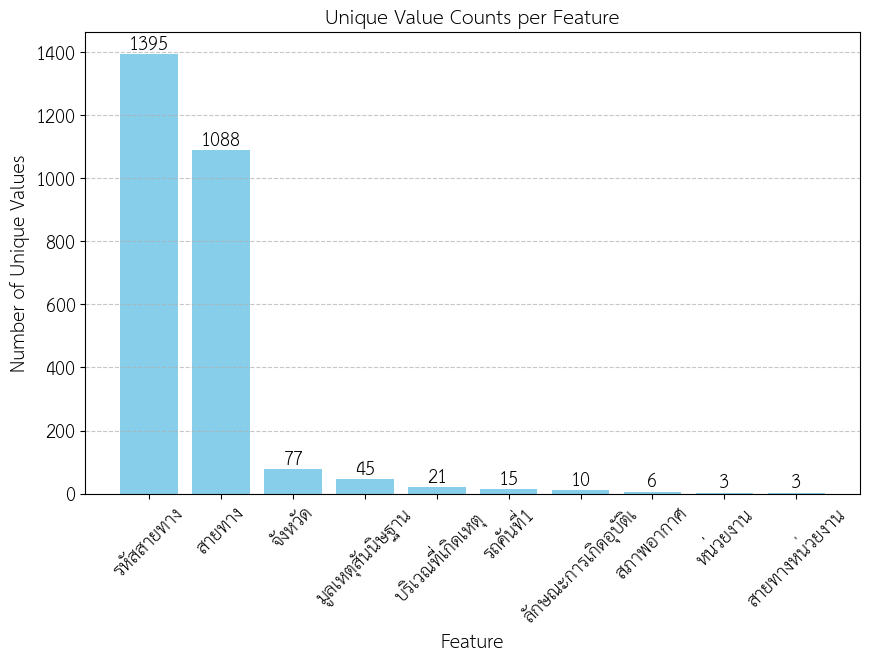

In [19]:
plot_nunique_values(df,categorical_feature)

ข้อมูล Categorical มีจำนวน unique value ในแต่ละ column ค่อนข้างสูง
* จังหวัดมี unique value คือ 77 ชี้ให้เห็นว่าอุบัติเหตุเกิดขึ้นทุกจังหวัดในไทย
* รหัสสายทางและสายทาง มี unique value ค่อนข้างมาก เนื่องจาก อุบัติเกิดขึ้นได้ทั่วทั้งประเทศไทย
* มูลเหตุ / ลักษณะที่เกิดเหตุ / บริเวณที่เกิดเหตุ / รถคันที่1 มี unique value ที่ค่อนข้างสูงชี้ให้เห็นถึง ความหลากหลายของลักษณะและ location การเกิดเหตุในข้อมูล

Next Action 
* ควรมีการ Group ข้อมูลเข้าด้วยกัน

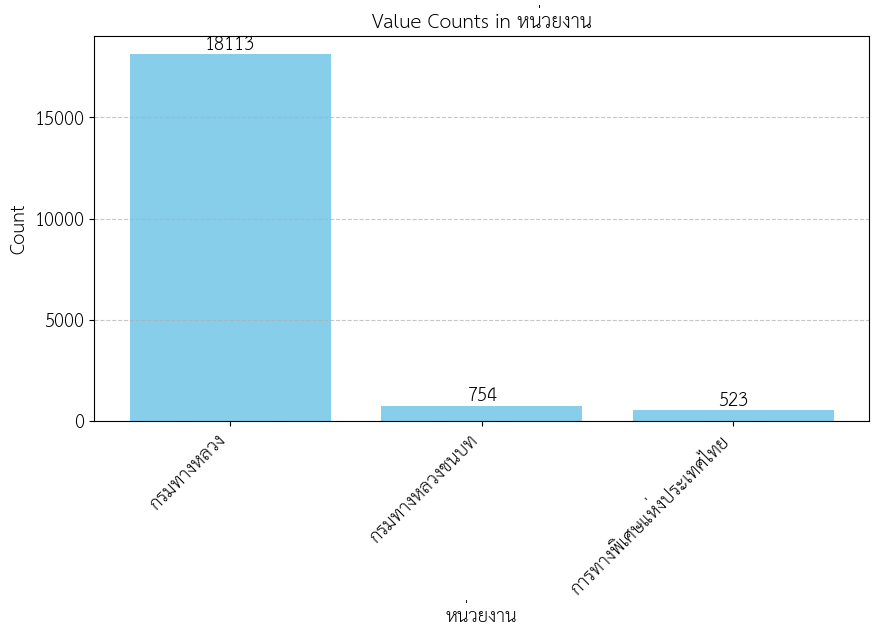

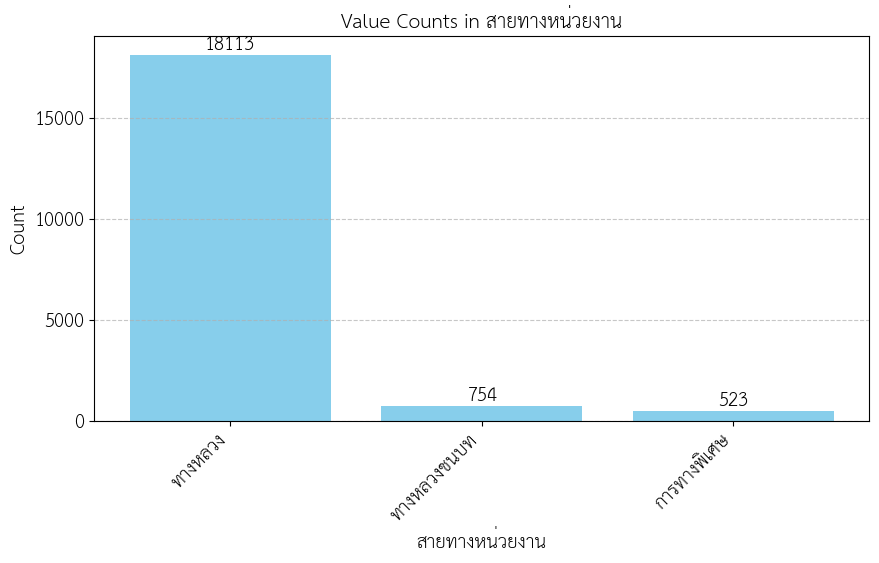

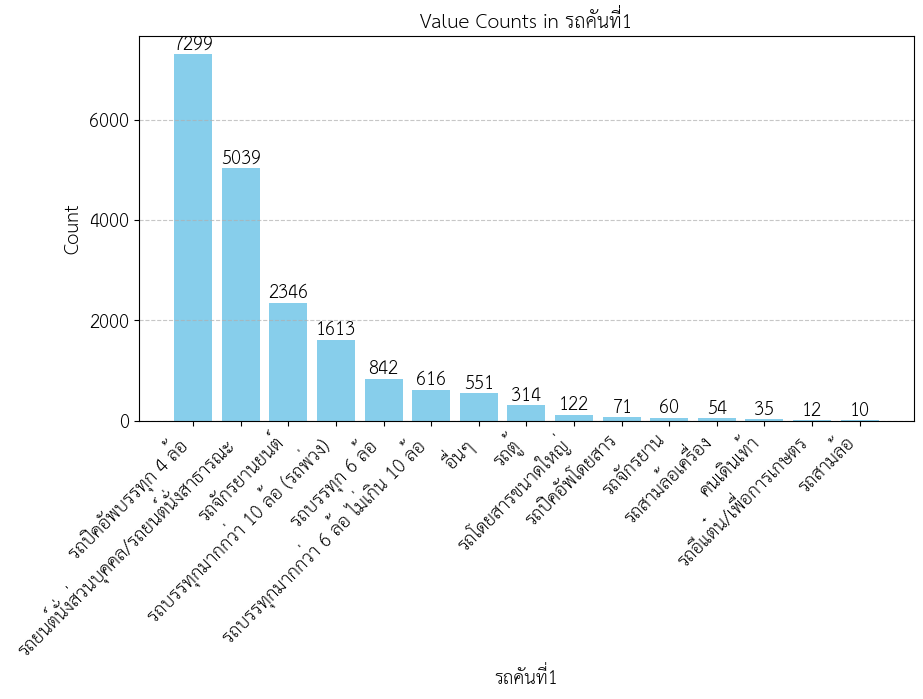

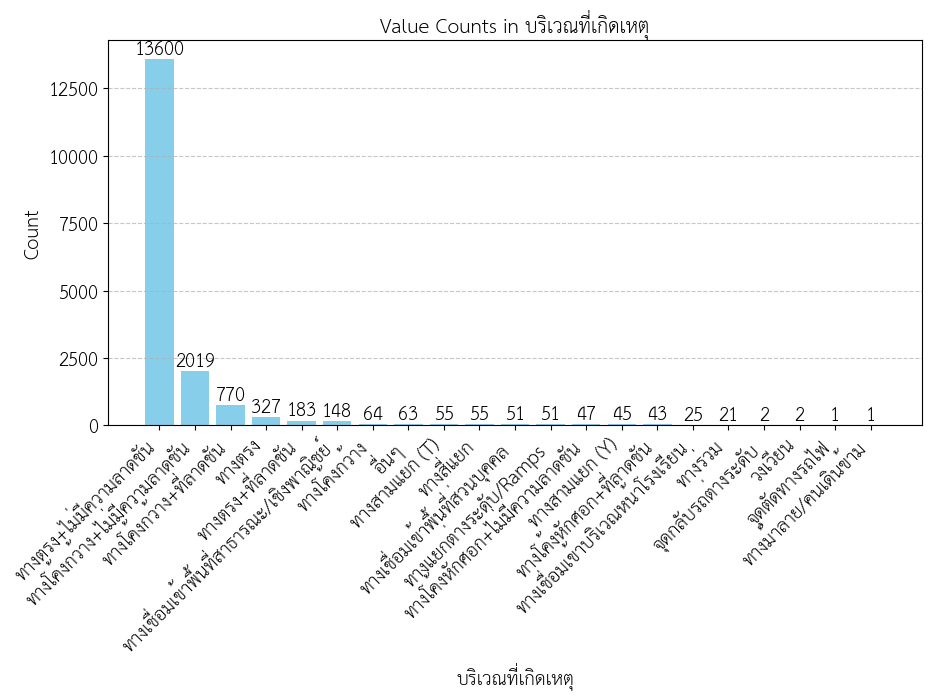

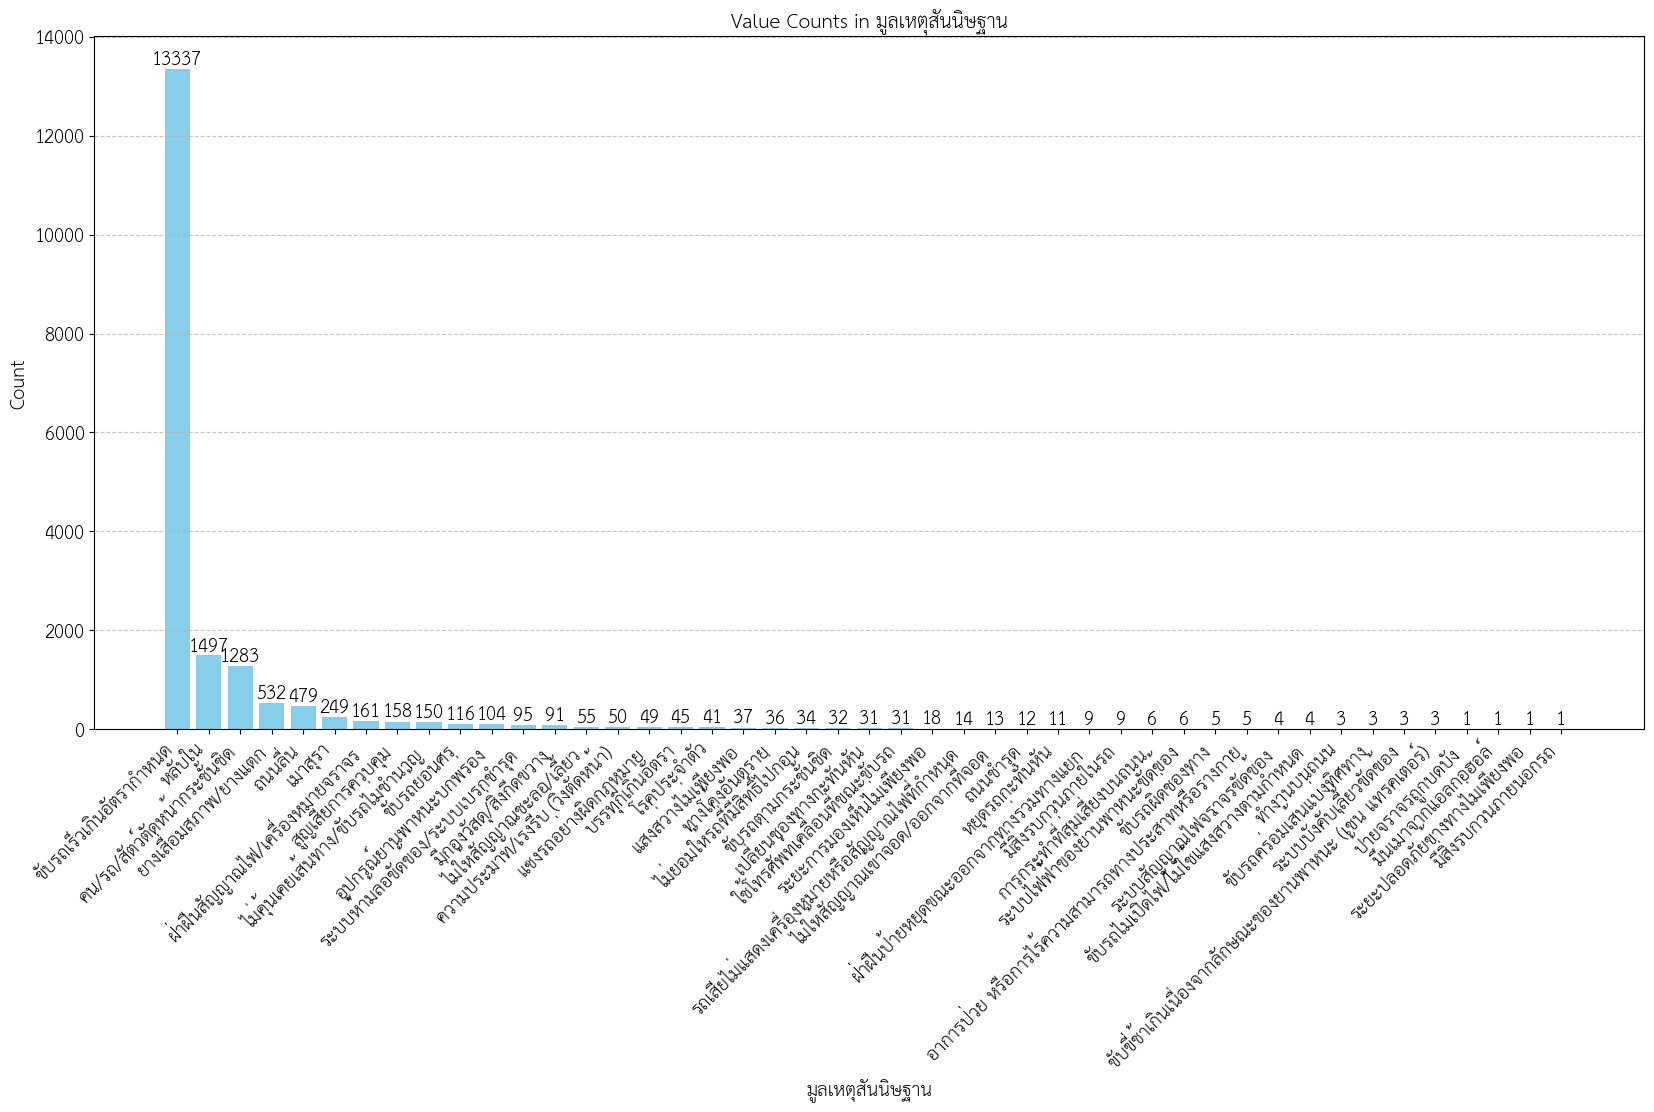

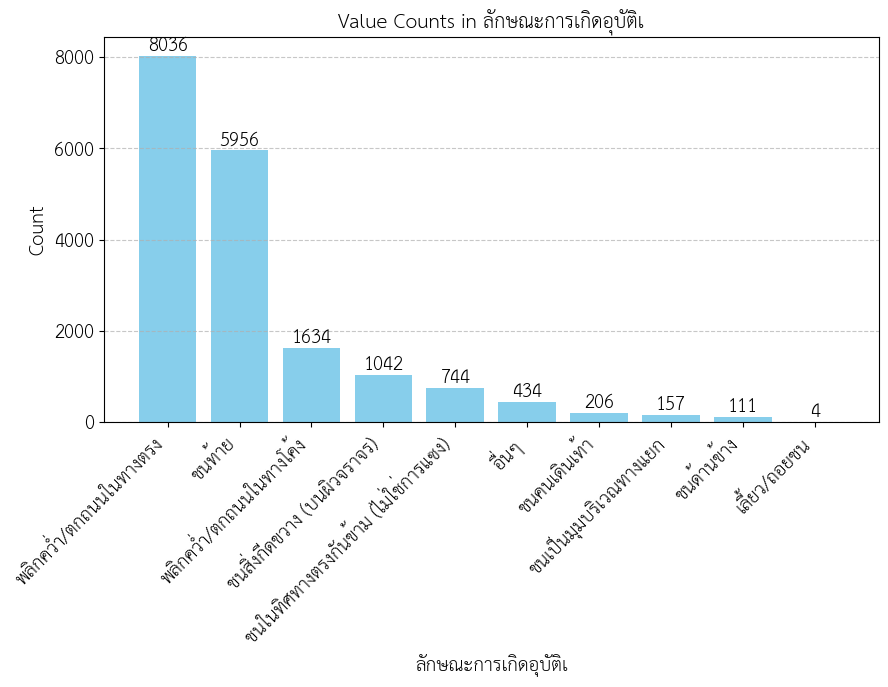

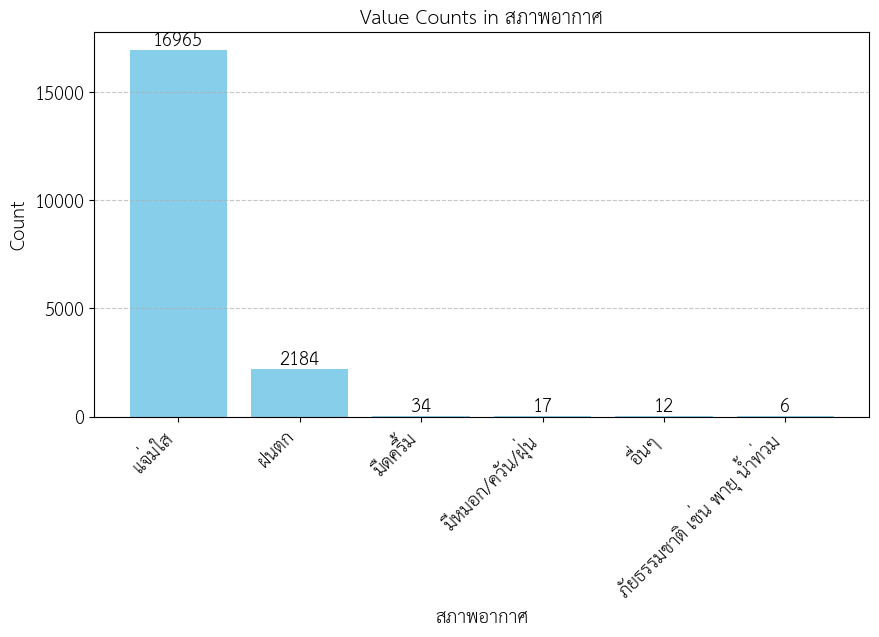

In [20]:
selected_column = ['หน่วยงาน',
 'สายทางหน่วยงาน',
 'รถคันที่1',
 'บริเวณที่เกิดเหตุ',
 'มูลเหตุสันนิษฐาน',
 'ลักษณะการเกิดอุบัติเ',
 'สภาพอากาศ']
plot_value_counts(df, selected_column)

### Numerical

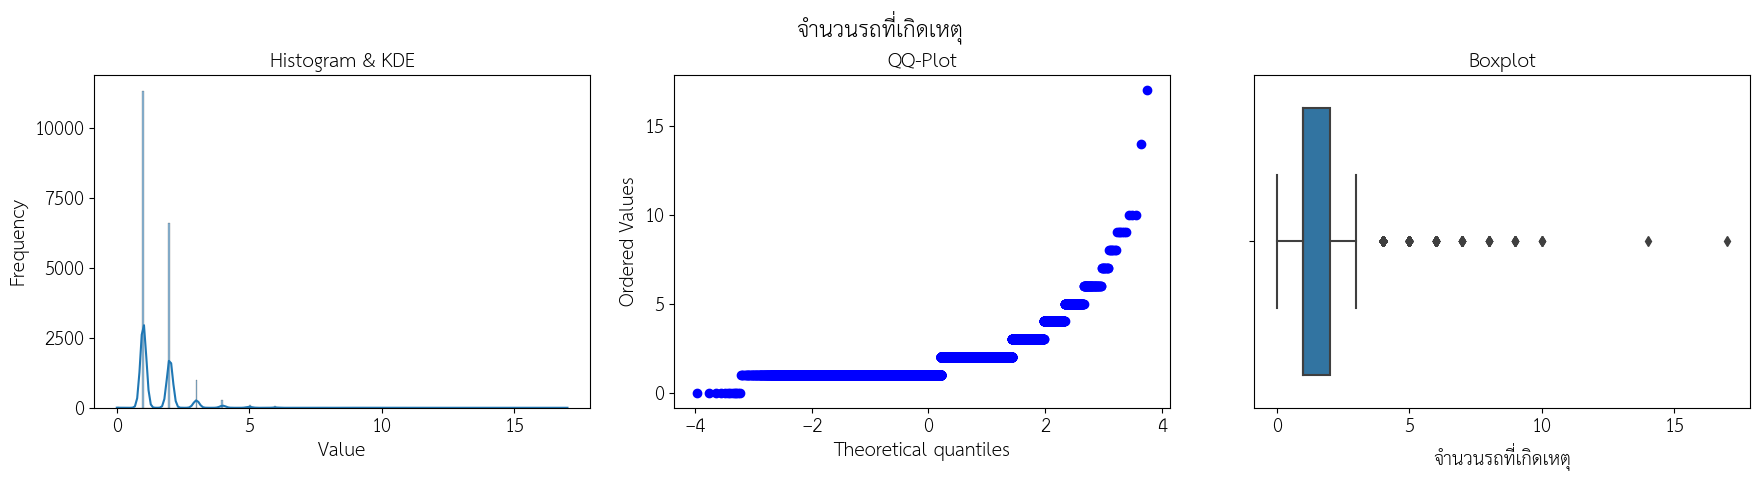

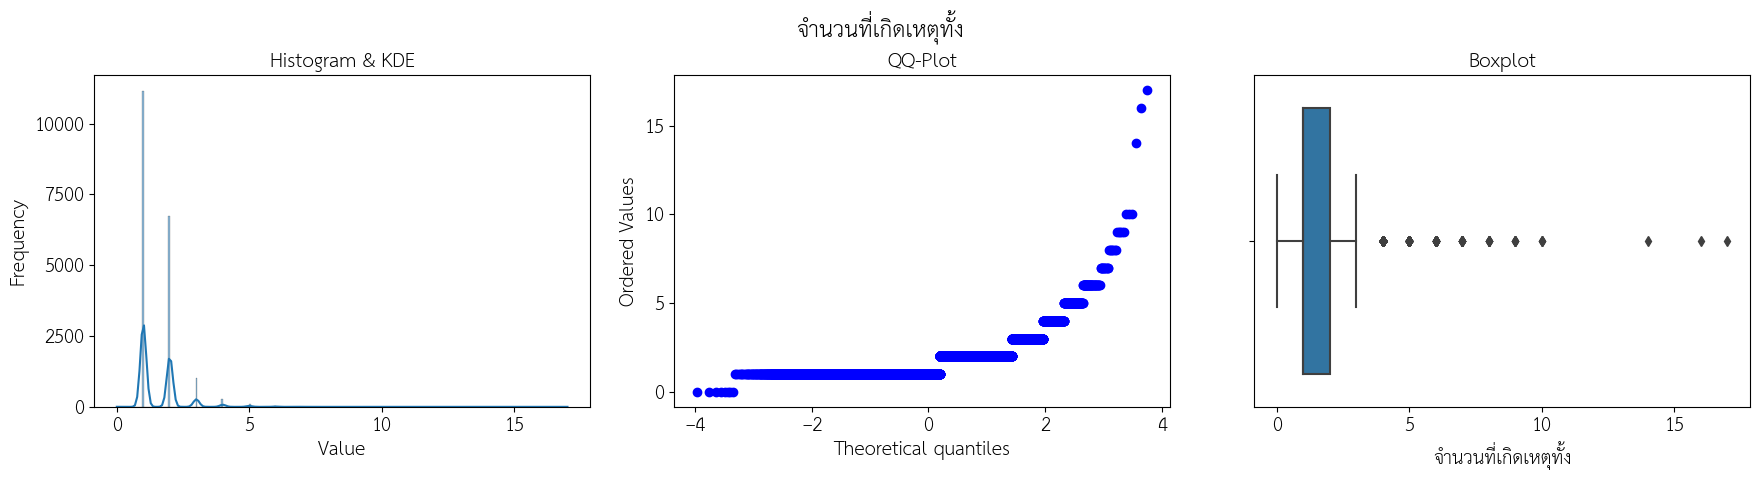

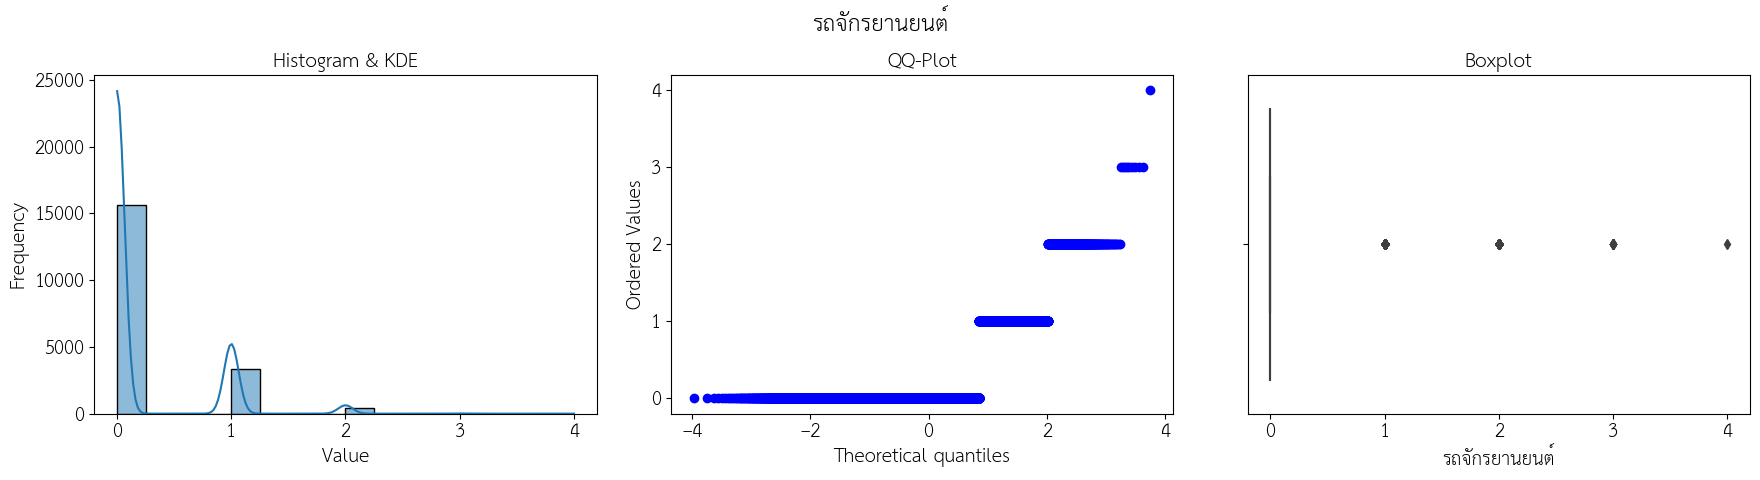

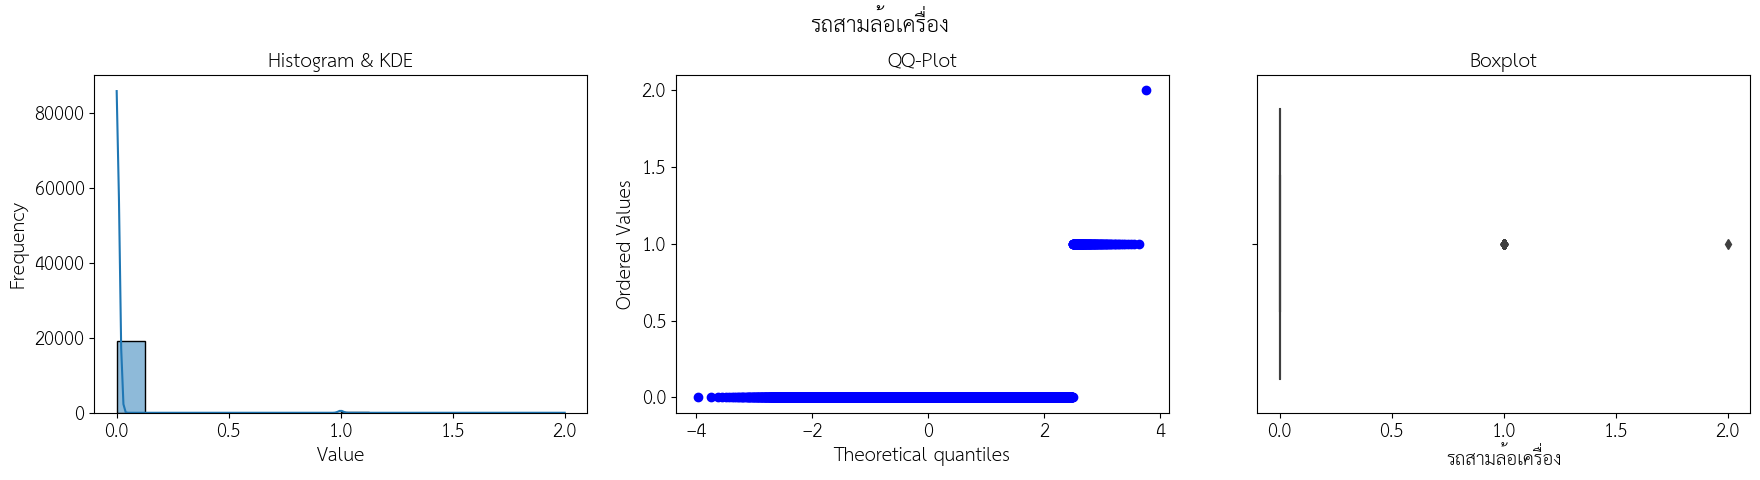

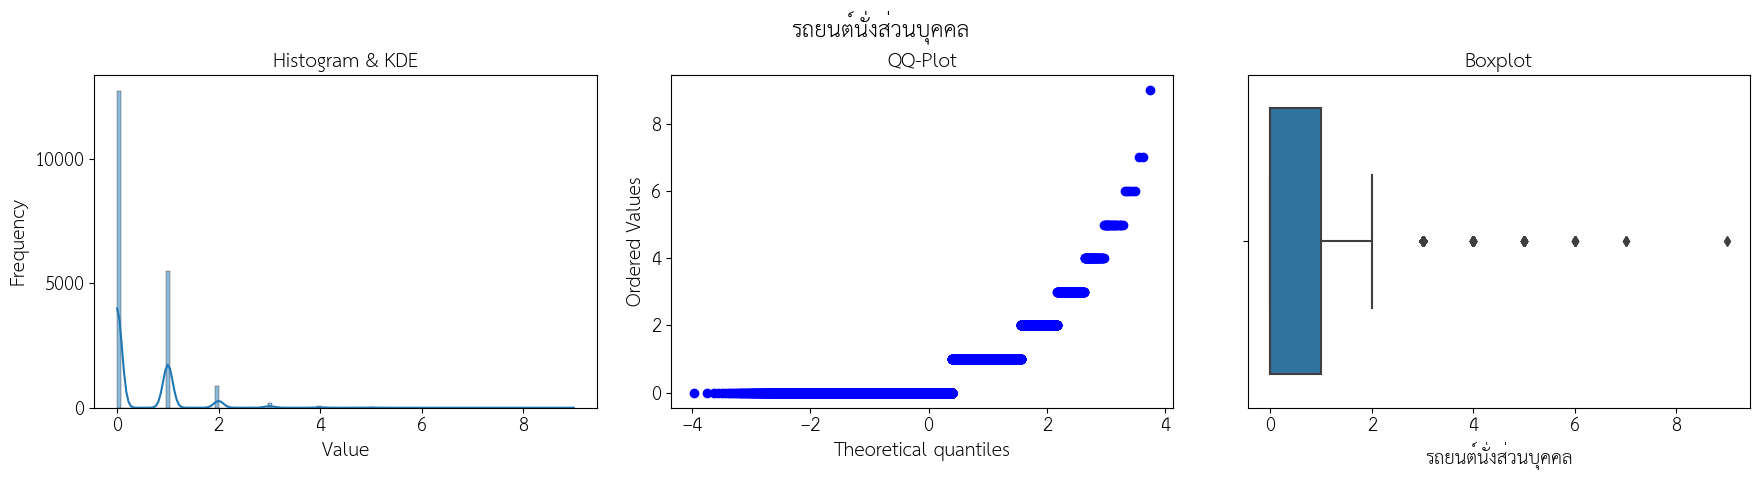

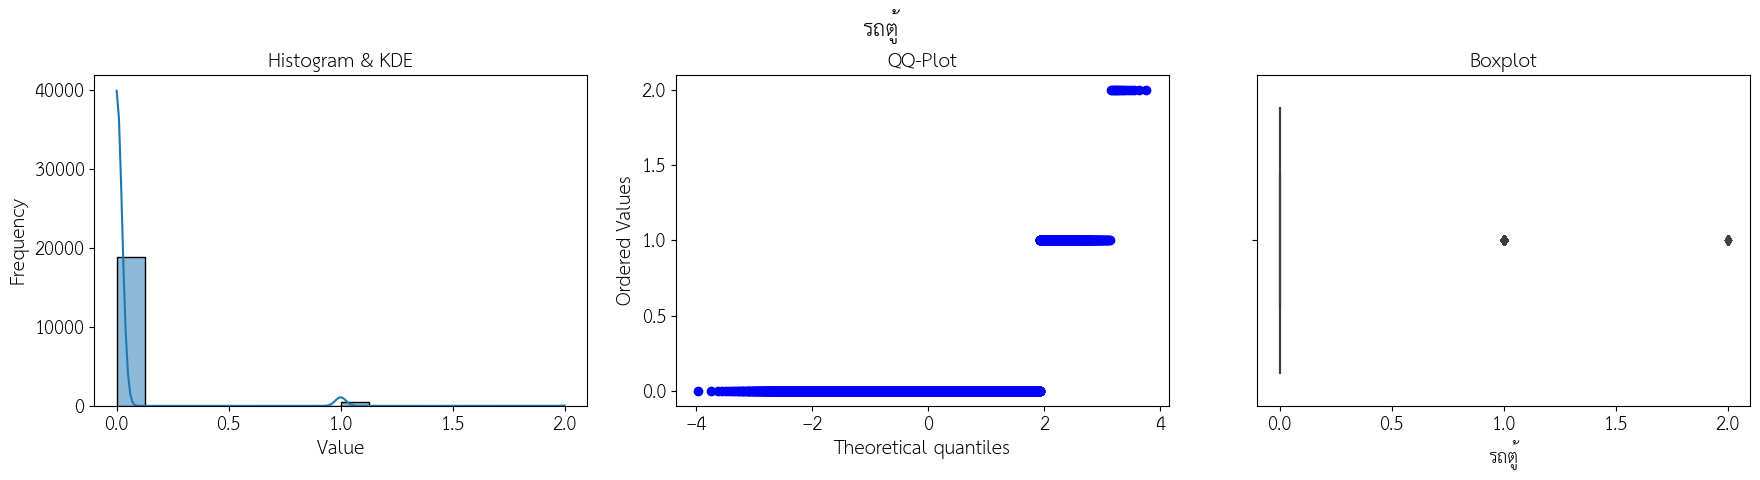

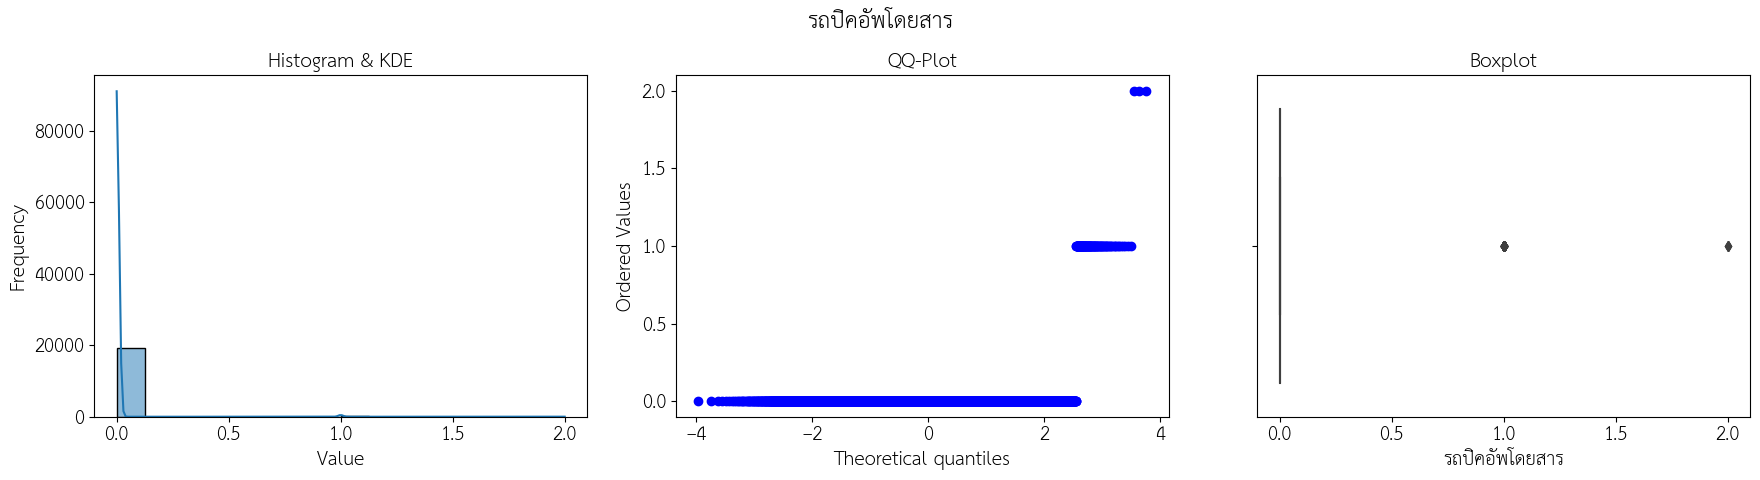

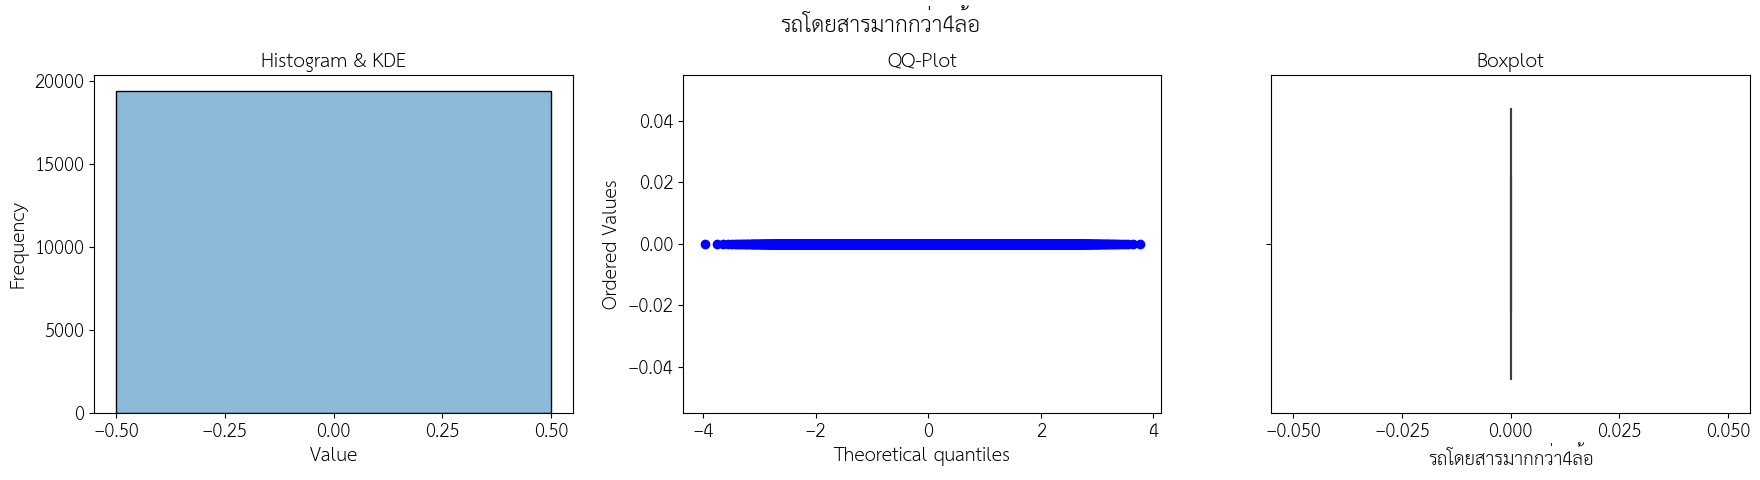

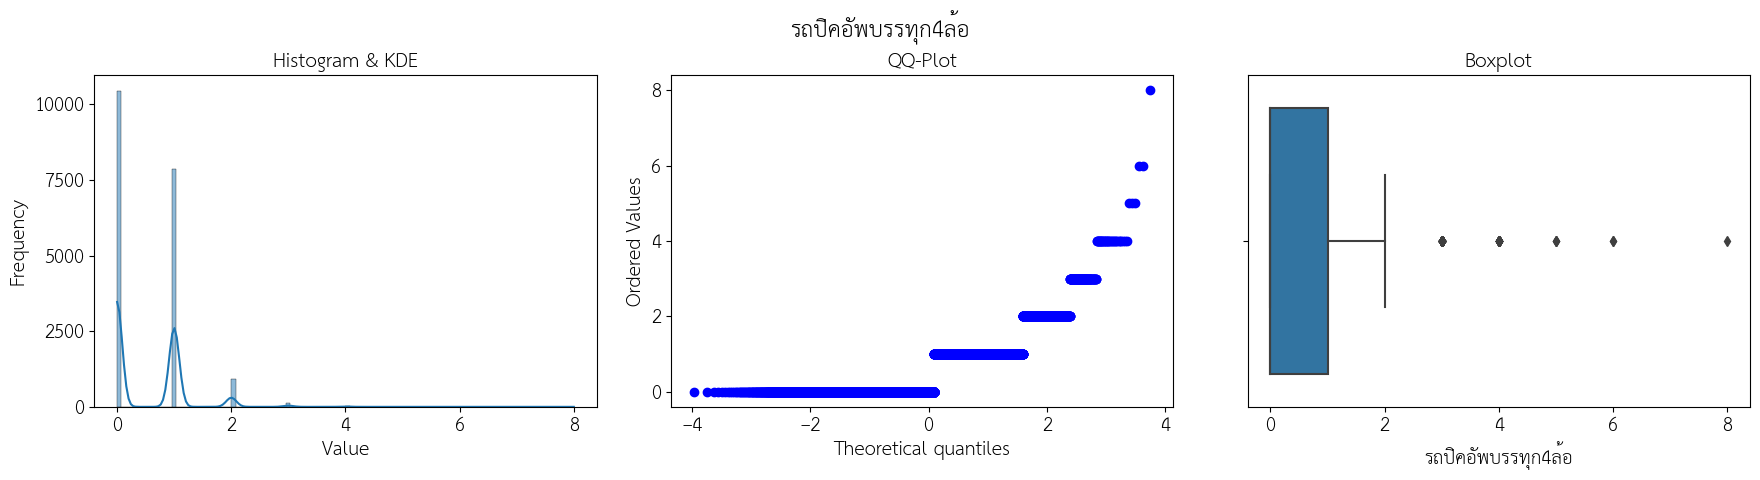

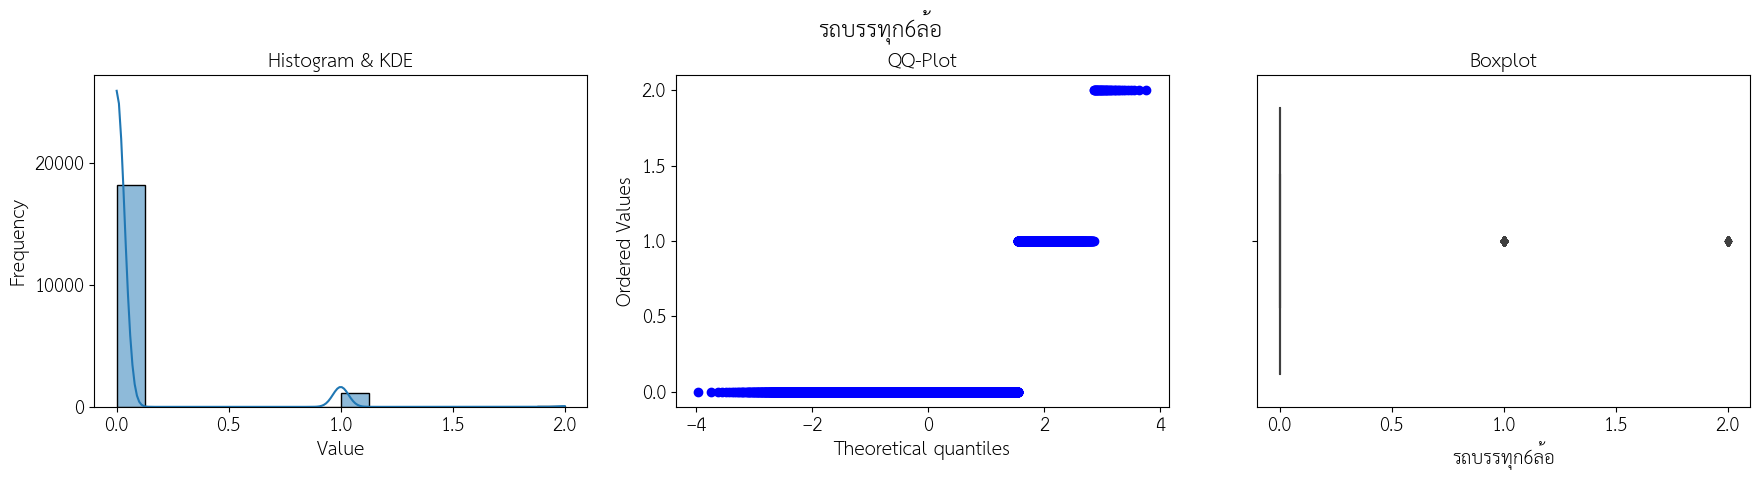

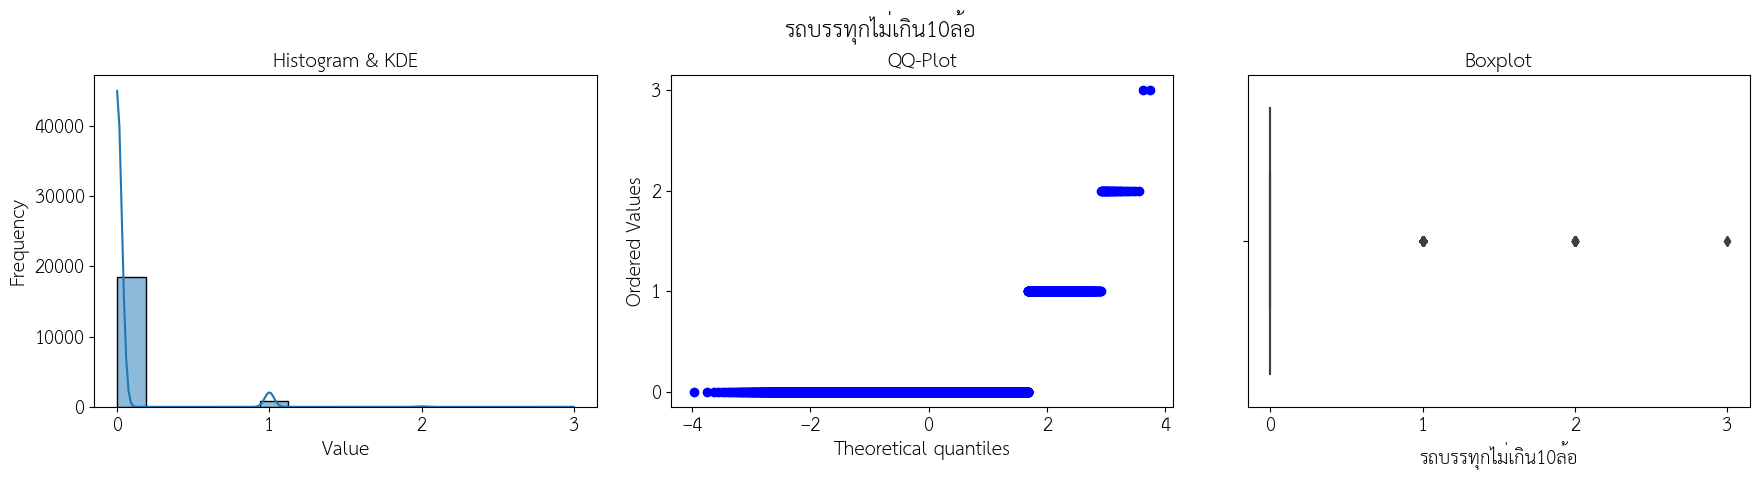

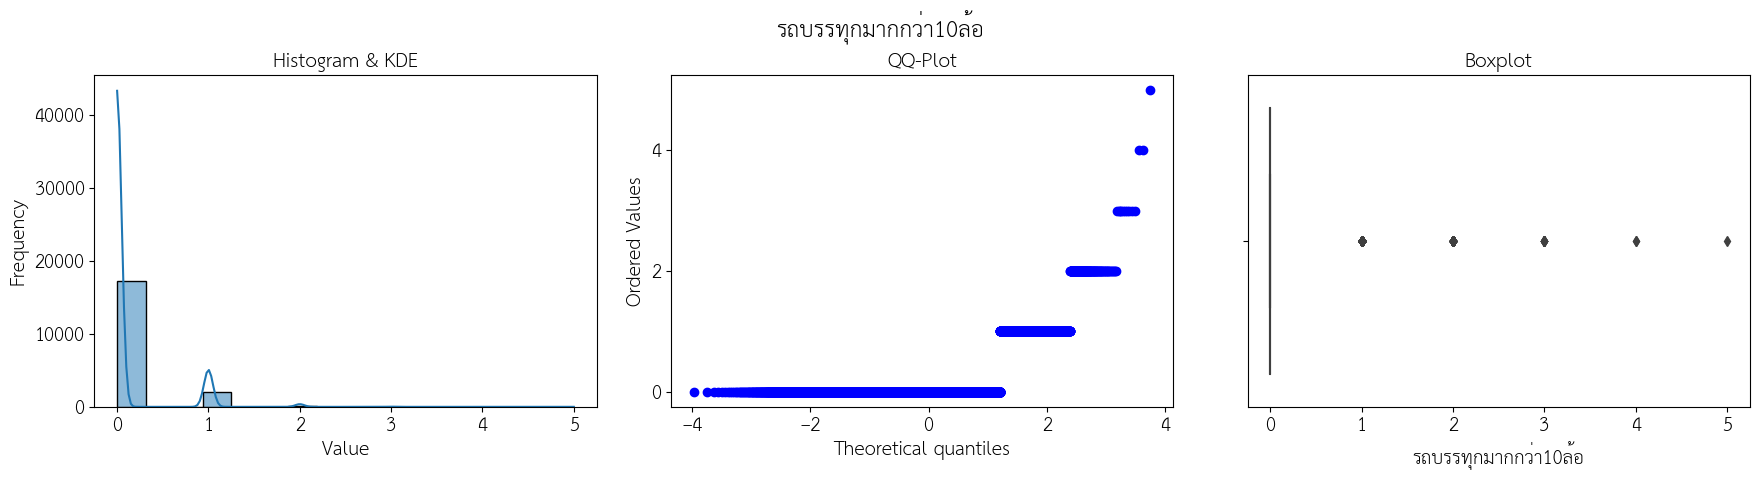

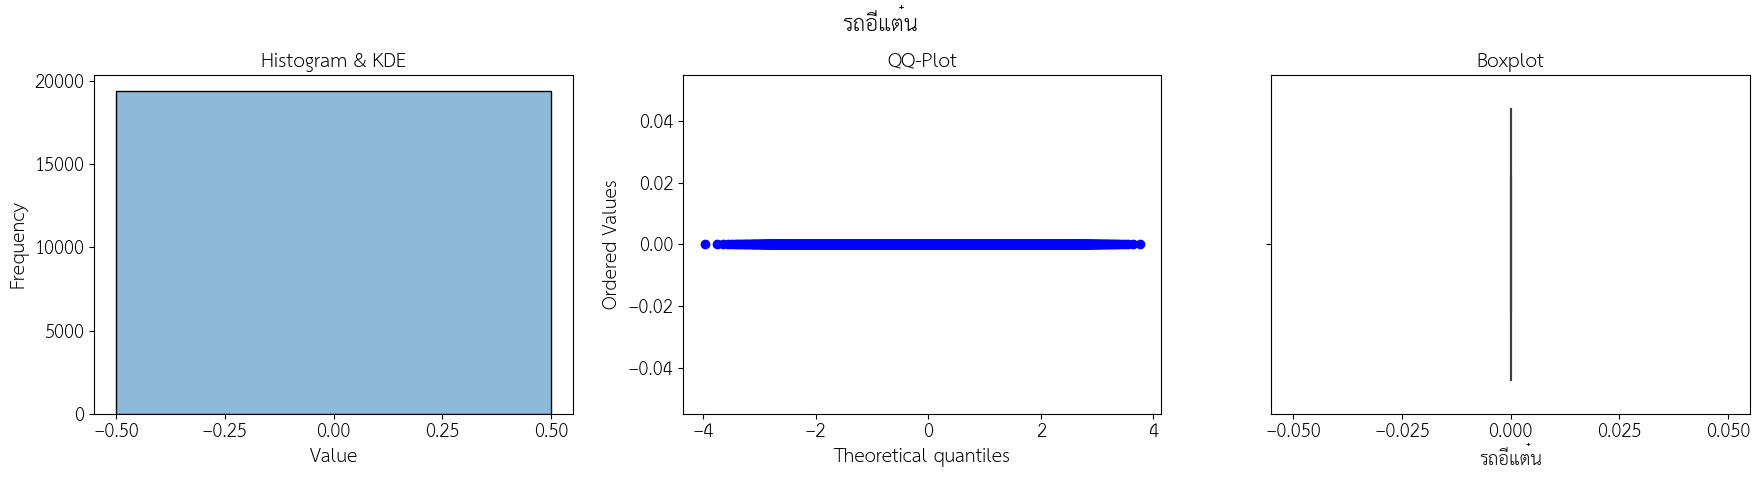

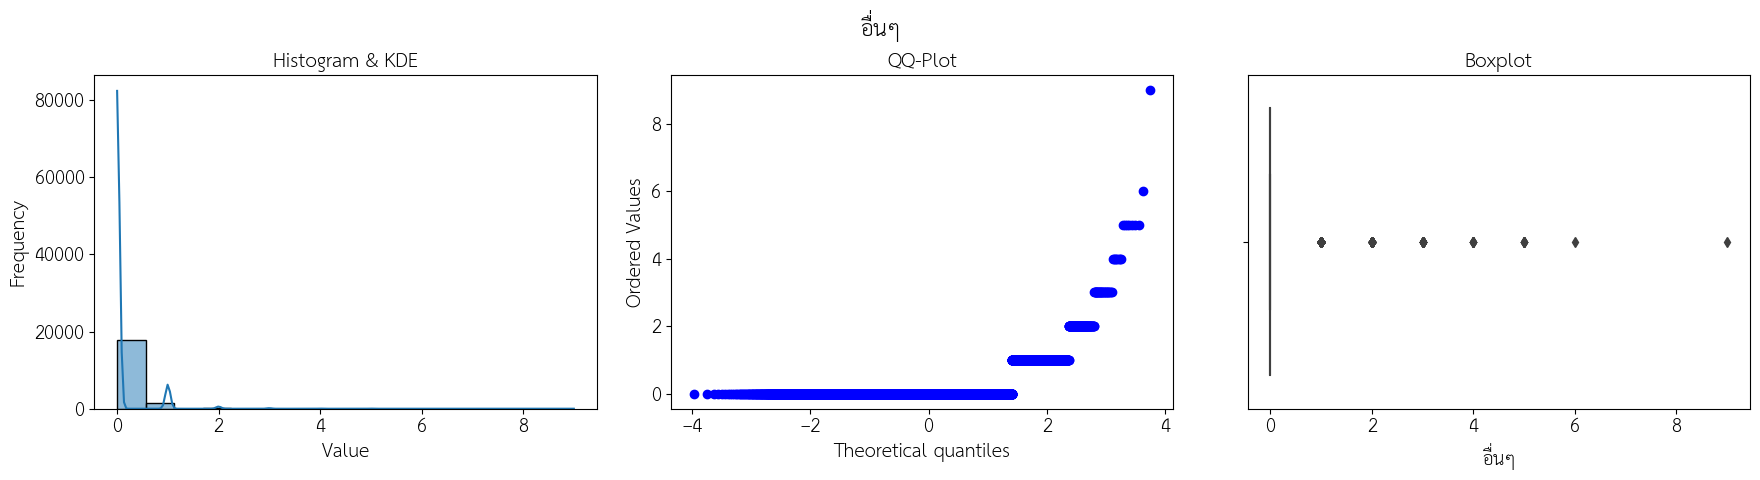

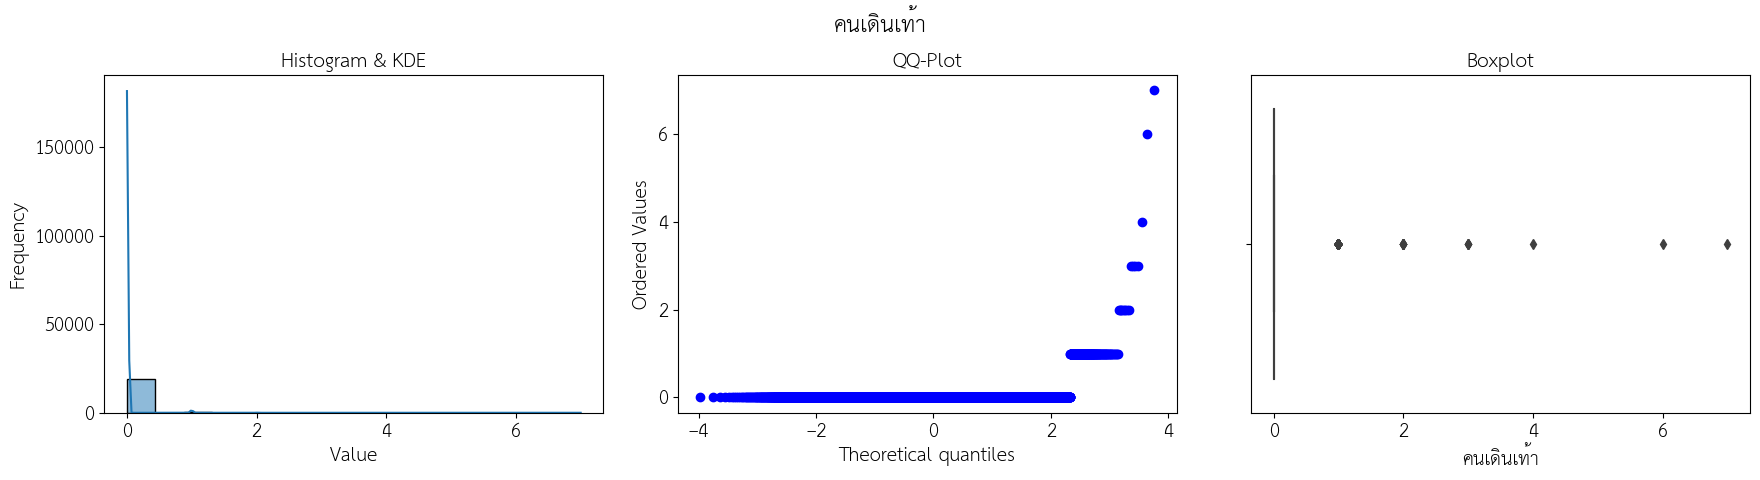

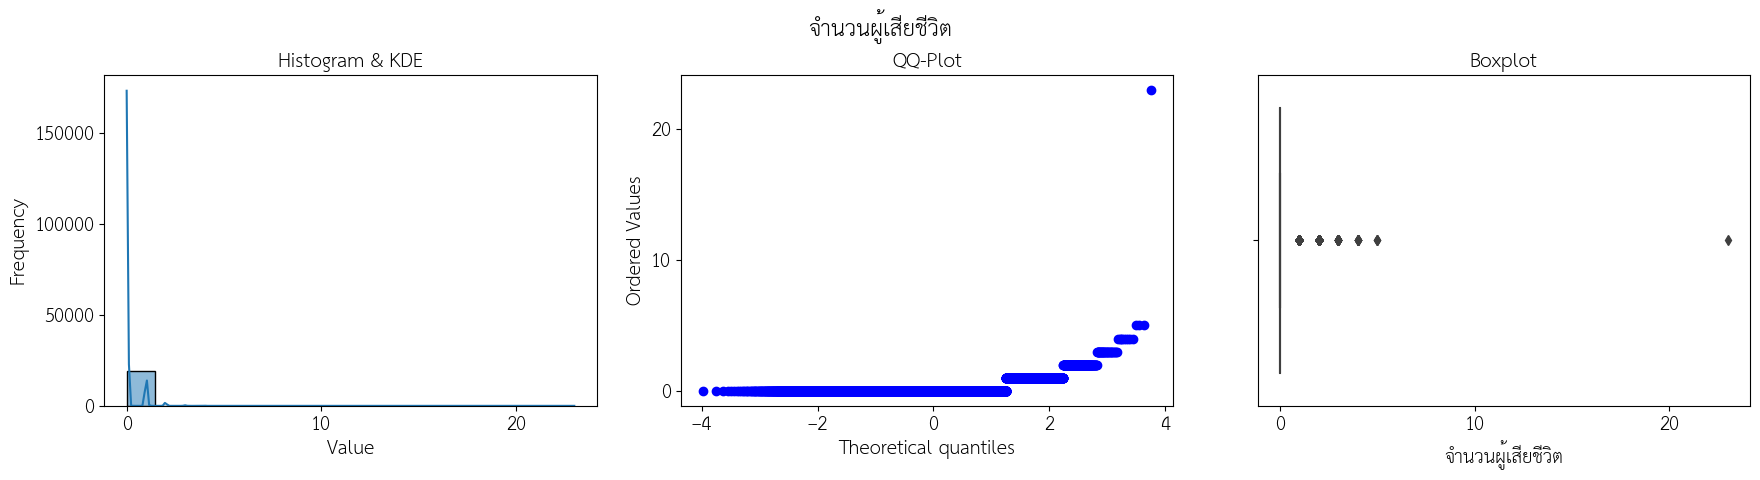

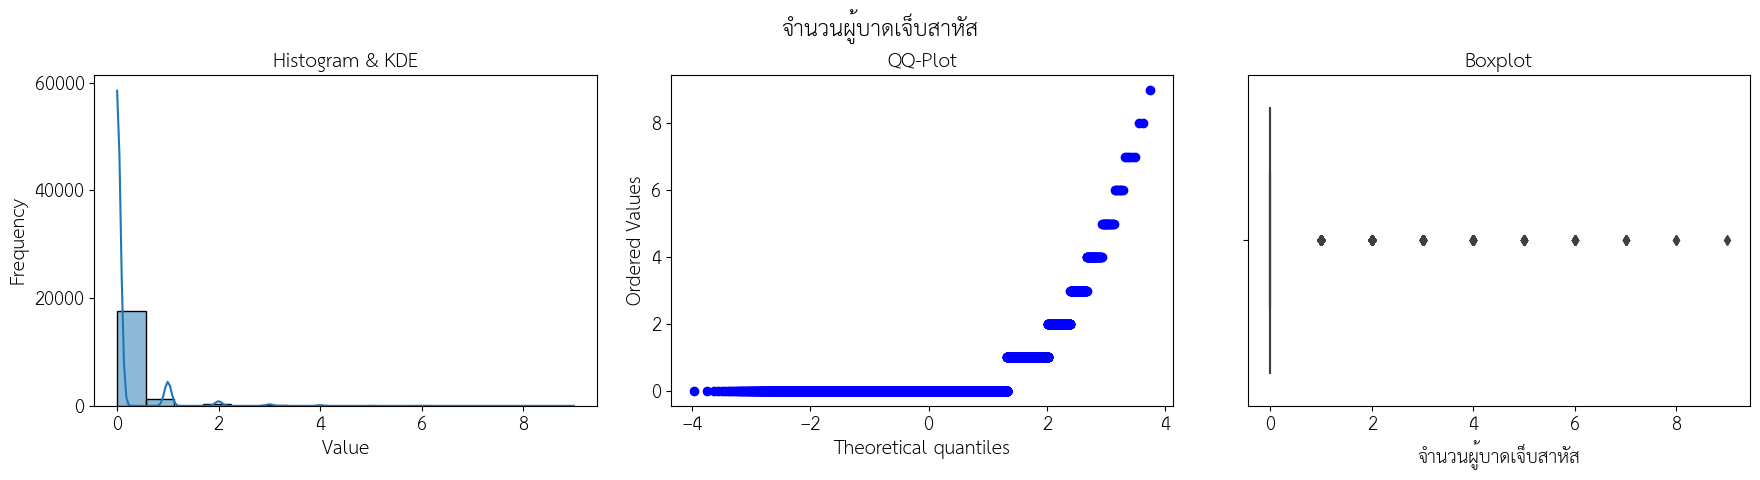

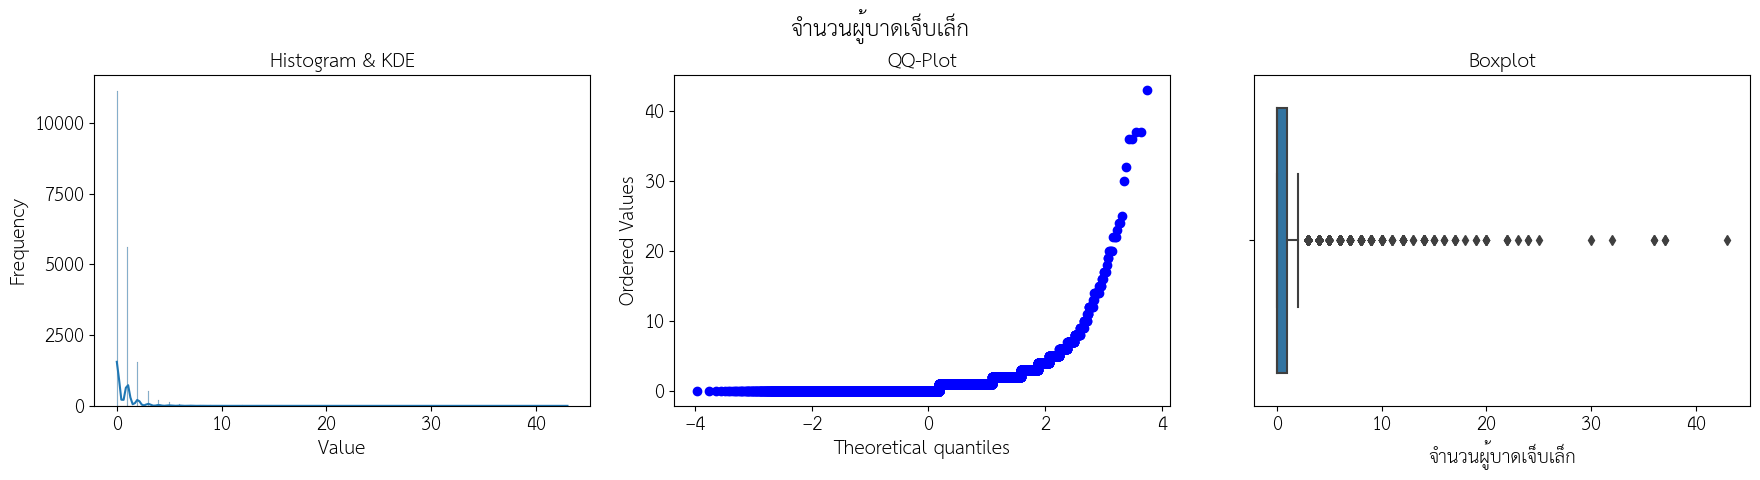

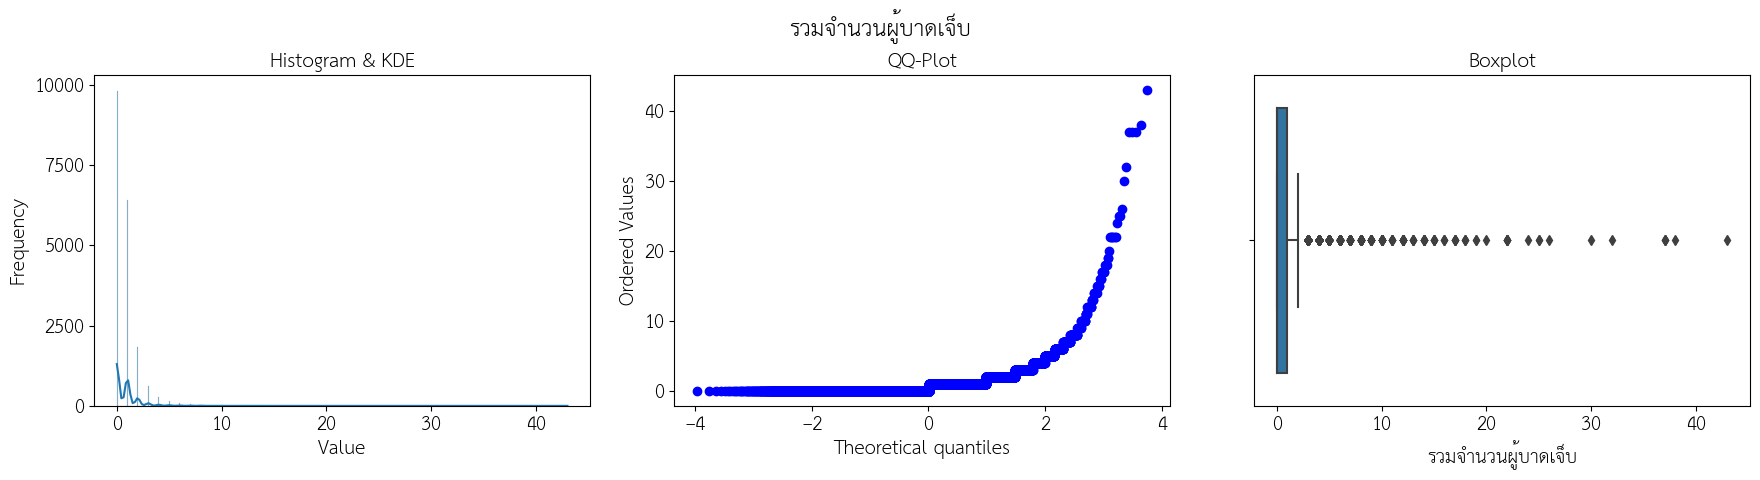

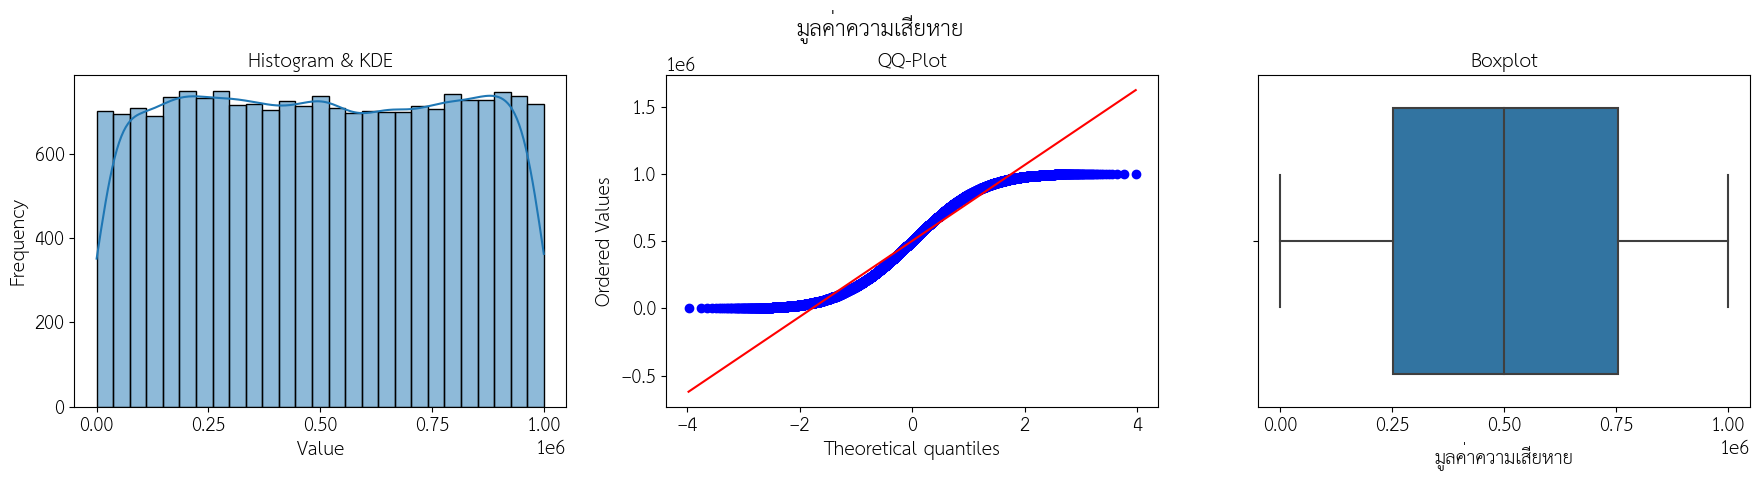

In [21]:
for column in numerical_feature:
    plot_distributions(df[column],column)


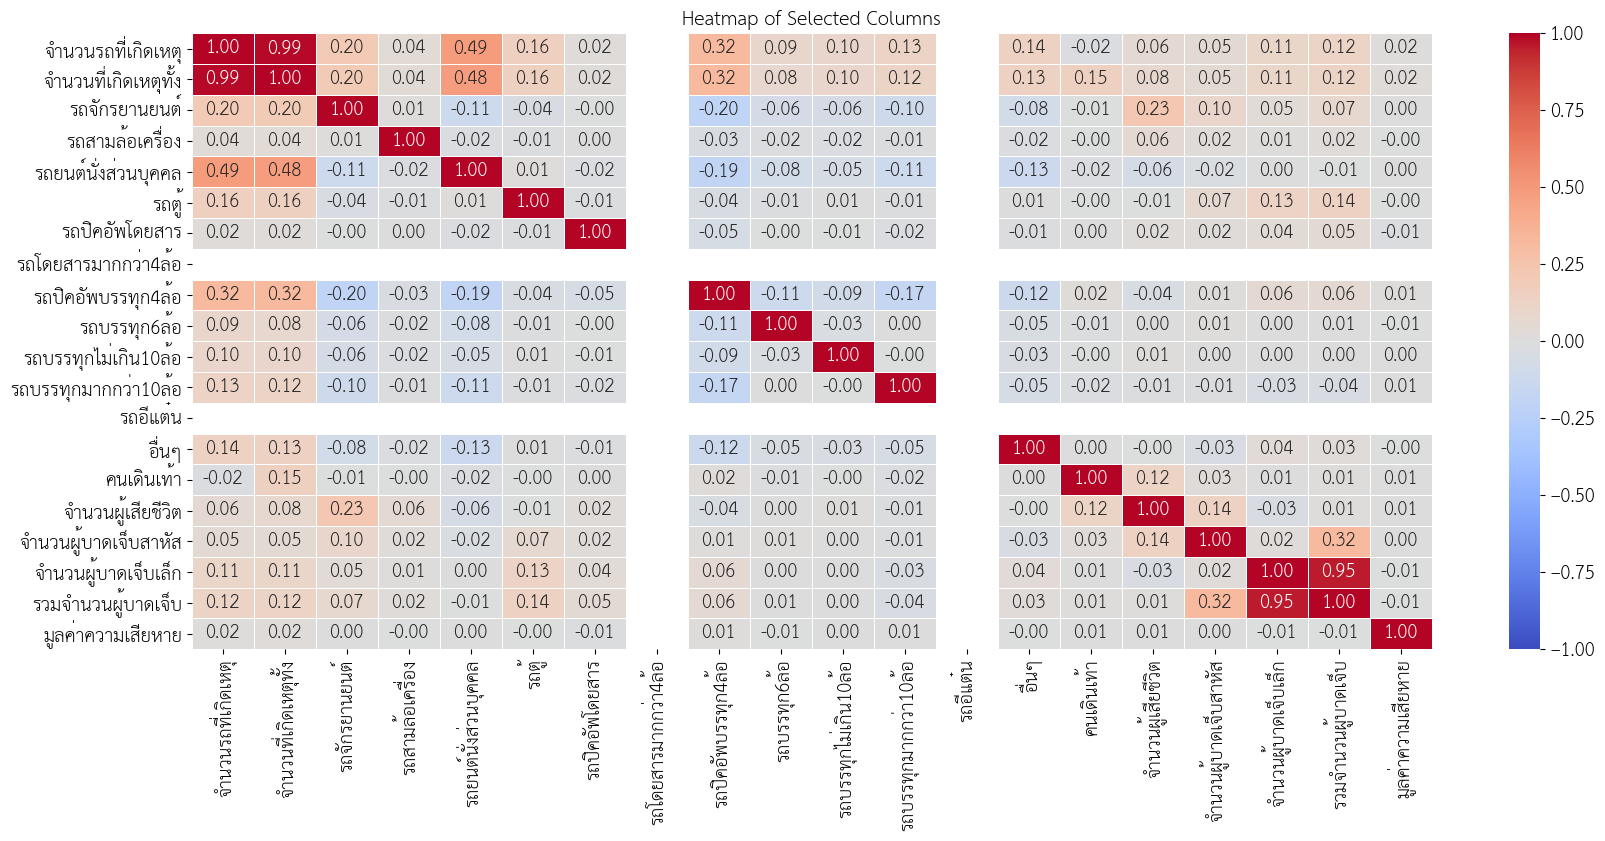

In [22]:
plot_heatmap(df,numerical_feature)

In [23]:
get_high_correlation_pairs(df,numerical_feature, threshold=0.50)

,Feature 1,Feature 2,Correlation
0,จำนวนรถที่เกิดเหตุ,จำนวนที่เกิดเหตุทั้ง,0.986356
1,จำนวนที่เกิดเหตุทั้ง,จำนวนรถที่เกิดเหตุ,0.986356
2,จำนวนผู้บาดเจ็บเล็ก,รวมจำนวนผู้บาดเจ็บ,0.953316
3,รวมจำนวนผู้บาดเจ็บ,จำนวนผู้บาดเจ็บเล็ก,0.953316


มี column ที่มีความ correlate กันเองสูง ซึ่งเป็นผลจากการรวม column อื่น ๆ เช่น column ที่เกี่ยวกับรถมี column ที่ชื่อ จำนวนรถที่เกิดเหตุนอกจากนี้ยังมี column จำนวนที่เกิดเหตุทั้ง ที่รวมทั้งคนทั้งรถ

Key Takeaway
* ข้อมูลส่วนใหญ่เป็น discrete
* ข้อมูลส่วนใหญ่มี outlier 
* ข้อมูลมักจะไม่มีความเป็น normal distribution